# Scrape Wikipedia's list of Broadway theatres

According to this [Wikipedia article](https://en.wikipedia.org/wiki/Broadway_theatre), Broadway theatre, or Broadway, are the theatrical performances presented in the 41 professional theatres, located in the Theater District and the Lincoln Center along Broadway, in Midtown Manhattan, New York City. 

https://en.wikipedia.org/wiki/Broadway_theatre#Broadway_theatres_and_current_productions

In [72]:
import requests  ## used for requesting to access the HTML webpage
import pandas as pd
import plotly.express as px
from bs4 import BeautifulSoup 

In [51]:
url = 'https://en.wikipedia.org/wiki/Broadway_theatre#Broadway_theatres_and_current_productions'

In [52]:
theatres = []
theatre_address = []
theatre_capacity = []
theatre_owner = []

In [53]:
html = requests.get(url)
soup = BeautifulSoup(html.content, 'html.parser') ##Using Beautiful Soup from bs4 package to read the webpage
table = soup.find('tbody')  ## soup.find searches for the table from webpage
rows = table.find_all('tr') ## searches rows (tr is the HTML code for rows)
for row in rows:
    cols=row.find_all('td')
    cols=[x.text.strip() for x in cols]
    if cols:
        theatres.append(cols[0])
        theatre_address.append(cols[1])
        theatre_capacity.append(cols[2])
        theatre_owner.append(cols[3])

In [64]:
## Having scrapped all the relevant data, converting the data into a dataframe
df = pd.DataFrame({'theatre': theatres,
                   'address': theatre_address, 
                   'capacity': theatre_capacity,
                   'owner': theatre_owner,
                  })

In [65]:
df.head()

,theatre,address,capacity,owner
0,Al Hirschfeld Theatre,W. 45th St. (No. 302),1424,Jujamcyn Theaters
1,Ambassador Theatre,W. 49th St. (No. 219),1125,Shubert Organization
2,American Airlines Theatre,W. 42nd St. (No. 227),740,Roundabout Theatre Company
3,August Wilson Theatre,W. 52nd St. (No. 245),1228,Jujamcyn Theaters
4,Belasco Theatre,W. 44th St. (No. 111),1018,Shubert Organization


In [69]:
## save data in a csv file
df.to_csv('broadway_theatres.csv', index=False)

## Data Exploration and Visualization

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   theatre   41 non-null     object
 1   address   41 non-null     object
 2   capacity  41 non-null     object
 3   owner     41 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [93]:
# convert entries in capacity column to integers
df.capacity = df.capacity.astype(int)

In [100]:
# get top 5 theatres by capacity
df.sort_values(by='capacity', ascending=False)

,theatre,address,capacity,owner
13,Gershwin Theatre,W. 51st St. (No. 222),1933,Nederlander Organization
8,Broadway Theatre,W. 53rd St & Broadway (No. 1681),1761,Shubert Organization
30,New Amsterdam Theatre,W. 42nd St. (No. 214),1747,Disney Theatrical Group
31,Palace Theatre,W. 47th St. & Broadway (No. 1564),1743,Nederlander Organization
26,Minskoff Theatre,W. 45th St. (No. 200),1710,Nederlander Organization
33,St. James Theatre,W. 44th St. (No. 246),1709,Jujamcyn Theaters
24,Majestic Theatre,W. 44th St. (No. 245),1645,Shubert Organization
23,Lyric Theatre,W. 43rd St. (No. 214),1622,Ambassador Theatre Group
25,Marquis Theatre,W. 46th St. (No. 210),1612,Nederlander Organization
40,Winter Garden Theatre,W. 50th St. & Broadway (No. 1634),1526,Shubert Organization


A sunburst plot represents hierarchial data as sectors laid out over several levels of concentric rings.
See https://plotly.com/python-api-reference/generated/plotly.express.sunburst.html.

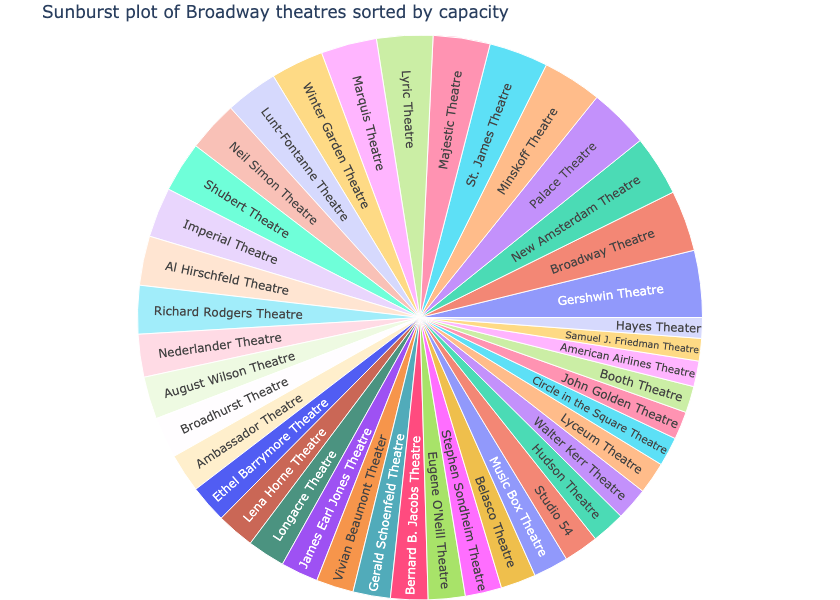

In [110]:
# create a sunburst plot with all theatres 
df_theatres = df.groupby(['theatre'], as_index=False).agg({'capacity': pd.Series})
df_theatres.sort_values(by='capacity', ascending=False, inplace=True)

fig = px.sunburst(df_theatres, 
                  path=['theatre'], 
                  values='capacity',
                  title="Sunburst plot of Broadway theatres sorted by capacity")
fig.update_layout(
    margin = dict(t = 35, l = 0, r = 0, b = 0),
    height=600,
    width=600
    
)
fig.show()

In [99]:
df.owner.unique()

array(['Jujamcyn Theaters', 'Shubert Organization',
       'Roundabout Theatre Company', 'Independent',
       'Nederlander Organization', 'Second Stage Theater',
       'Ambassador Theatre Group', 'Disney Theatrical Group',
       'Manhattan Theatre Club', 'Lincoln Center Theatre'], dtype=object)

In [ ]:
len(df.owner.unique())

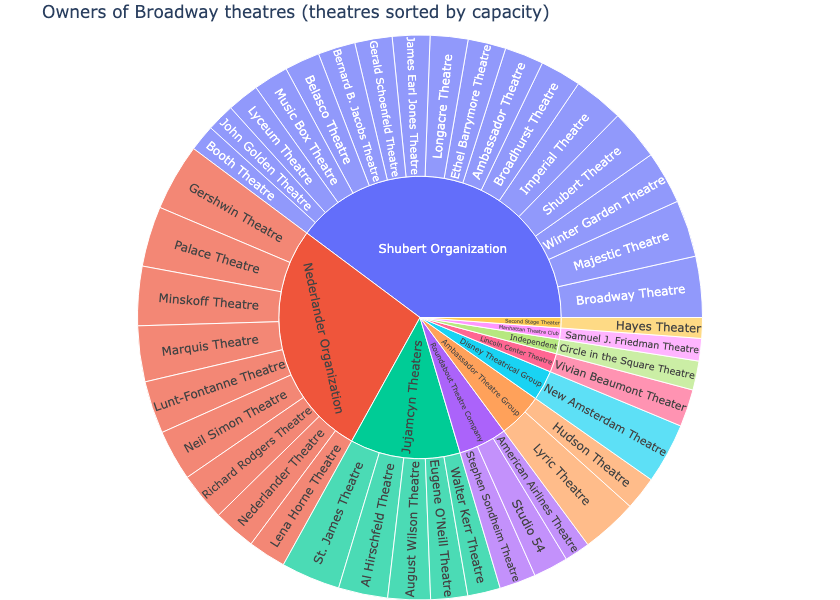

In [117]:
# create a sunburst plot with all theatres and owners
df_theatres = df.groupby(['owner', 'theatre'], as_index=False).agg({'capacity': pd.Series})
df_theatres.sort_values(by='capacity', ascending=False, inplace=True)

fig = px.sunburst(df_theatres, 
                  path=['owner', 'theatre'], 
                  values='capacity',
                  title="Owners of Broadway theatres (theatres sorted by capacity)")
fig.update_layout(
    margin = dict(t = 35, l = 0, r = 0, b = 0),
    height=600,
    width=600
    
)
fig.show()